# Dimensionality Reduction

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

# Get the Data

In [6]:
df = pd.read_csv("/content/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [7]:
#Виведемо розмір датасету
print('Розмір датасету : ', df.shape)

Розмір датасету :  (3755, 11)


In [8]:
df.keys()

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [10]:
df['salary_in_usd']

,salary_in_usd
0,85847
1,30000
2,25500
3,175000
4,120000
...,...
3750,412000
3751,151000
3752,105000
3753,100000


In [11]:
df['remote_ratio']

,remote_ratio
0,100
1,100
2,100
3,100
4,100
...,...
3750,100
3751,100
3752,100
3753,100


Якщо у вашому датафреймі є текстові змінні (наприклад, 'SE'), їх потрібно закодувати в числовий формат. Використаємо Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
for col in df.select_dtypes(include='object').columns:
    df[col] = LabelEncoder().fit_transform(df[col])

In [13]:
#Виведемо розмір датасету
print('Розмір датасету : ', df.shape)

Розмір датасету :  (3755, 11)


# Principal component analysis

In [14]:
# Визначимо features and labels
X = df.drop(columns=['salary_in_usd'])  # 'salary_in_usd' -> цільова змінна
Y = df['salary_in_usd']


In [15]:
# Застосуємо Principal Component Analysis (PCA)
pca = PCA ()
X_pca = pca.fit_transform(X)

In [16]:
# Перевірка розмірності
X_pca.shape

(3755, 10)

In [17]:
# Обчислюємо дисперсії
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

In [18]:
print('Explained variance', exp_var_pca)
print('Cumulative explained variance', cum_sum_eigenvalues)

Explained variance [9.99999992e-01 5.24237833e-09 1.46626959e-09 7.51043803e-10
 4.02661511e-11 1.45510066e-11 1.72637926e-12 9.01693368e-13
 3.25147392e-13 3.91019154e-14]
Cumulative explained variance [0.99999999 1.         1.         1.         1.         1.
 1.         1.         1.         1.        ]


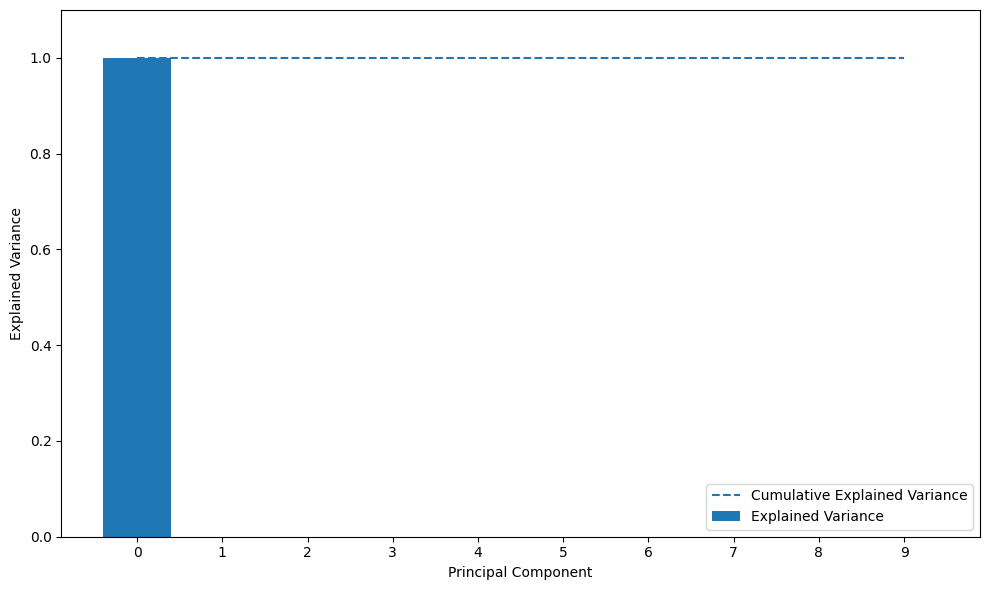

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(exp_var_pca)), exp_var_pca, align='center', label='Explained Variance')
plt.step(range(len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative Explained Variance', linestyle='--')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(range(len(exp_var_pca)))
plt.ylim(0, 1.1)  # Задайте ліміти для кращого вигляду
plt.legend(loc='best')
plt.tight_layout()
plt.show()

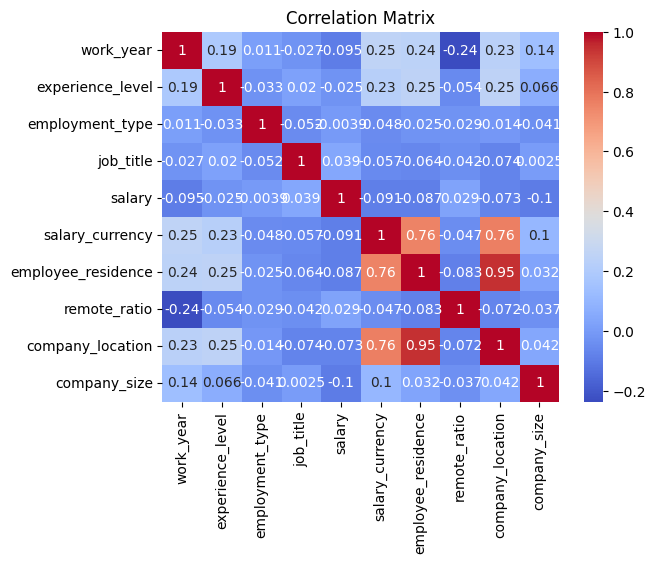

In [20]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

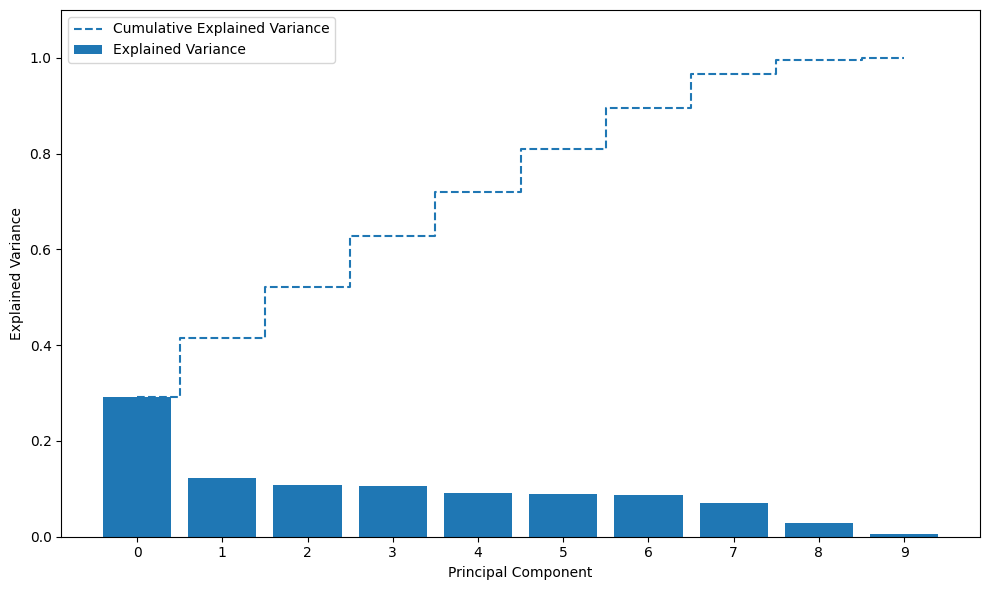

In [22]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize=(10, 6))
plt.bar(range(len(exp_var_pca)), exp_var_pca, align='center', label='Explained Variance')
plt.step(range(len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid', label='Cumulative Explained Variance', linestyle='--')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(range(len(exp_var_pca)))
plt.ylim(0, 1.1)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [23]:
# Знижуємо розмірність до двох
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': Y})

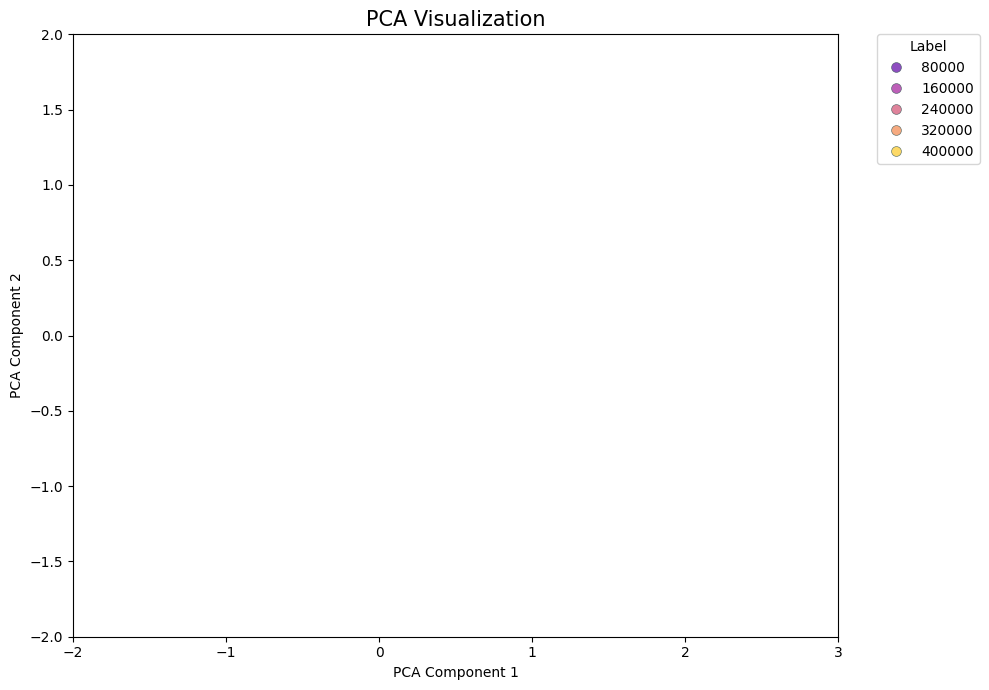

In [24]:
# Візуалізуємо результат
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(
    x='pca_1',
    y='pca_2',
    hue='label',
    palette='plasma',
    data=pca_result_df,
    ax=ax,
    s=50,
    edgecolor='darkslategrey',
    linewidth=0.5,
    alpha=0.7
)

# Встановлюємо межі осей, щоб краще побачити дані
ax.set_xlim(-2, 3)
ax.set_ylim(-2, 2)

# Налаштування графіка
ax.set_title('PCA Visualization', fontsize=15)
ax.set_xlabel('PCA Component 1', fontsize=10)
ax.set_ylabel('PCA Component 2', fontsize=10)
ax.legend(title='Label', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.tight_layout()

plt.show()

In [25]:
ax.set_xlim(None)  # Автоматичне визначення межі
ax.set_ylim(None)  # Автоматичне визначення межі

(-2.0, 2.0)

In [26]:
print(pca_result_df[['pca_1', 'pca_2']].min())
print(pca_result_df[['pca_1', 'pca_2']].max())

pca_1   -184695.571841
pca_2       -55.192954
dtype: float64
pca_1    3.020930e+07
pca_2    5.911440e+01
dtype: float64


In [27]:
pca_result_df['pca_1'] *= 10
pca_result_df['pca_2'] *= 10

In [28]:
sns.scatterplot(
    x='pca_1',
    y='pca_2',
    hue='label',
    palette='plasma',
    data=pca_result_df,
    ax=ax,
    s=100,  # Збільшений розмір точок
    edgecolor='darkslategrey',
    linewidth=0.5,
    alpha=1  # Зменшення прозорості
)

<Axes: title={'center': 'PCA Visualization'}, xlabel='PCA Component 1', ylabel='PCA Component 2'>

In [29]:
print(pca_result_df.head())

          pca_1       pca_2   label
0 -1.106956e+06  561.566980   85847
1 -1.606956e+06  528.357180   30000
2 -1.651956e+06  528.457656   25500
3 -1.569557e+05  576.677420  175000
4 -7.069557e+05  577.905452  120000


In [30]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
pca_result_scaled = scaler.fit_transform(pca_result)

pca_result_df['pca_1'] = pca_result_scaled[:, 0]
pca_result_df['pca_2'] = pca_result_scaled[:, 1]

In [31]:
print(pca_result_df[['pca_1', 'pca_2']].min())
print(pca_result_df[['pca_1', 'pca_2']].max())

pca_1    0.0
pca_2    0.0
dtype: float64
pca_1    1.0
pca_2    1.0
dtype: float64


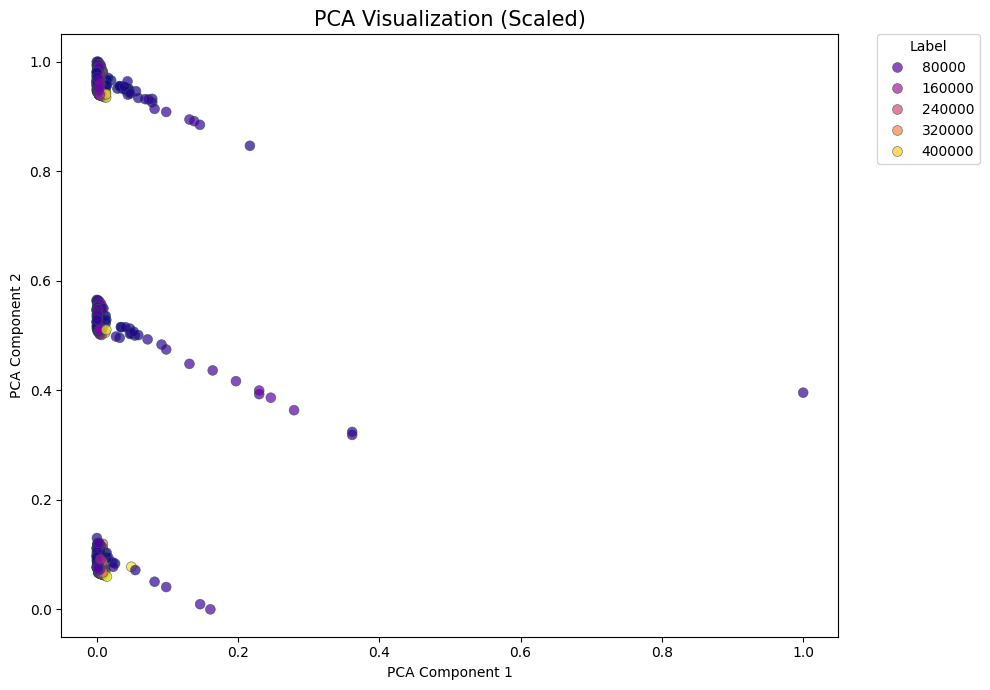

In [32]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.scatterplot(
    x='pca_1',
    y='pca_2',
    hue='label',
    palette='plasma',
    data=pca_result_df,
    ax=ax,
    s=50,
    edgecolor='darkslategrey',
    linewidth=0.5,
    alpha=0.7
)

ax.set_title('PCA Visualization (Scaled)', fontsize=15)
ax.set_xlabel('PCA Component 1', fontsize=10)
ax.set_ylabel('PCA Component 2', fontsize=10)
ax.legend(title='Label', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.tight_layout()
plt.show()

#tSNE

In [33]:
#Знижуємо розмірність до двох
tsne = TSNE(n_components = 2)
tsne_result = tsne.fit_transform(X)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': Y})

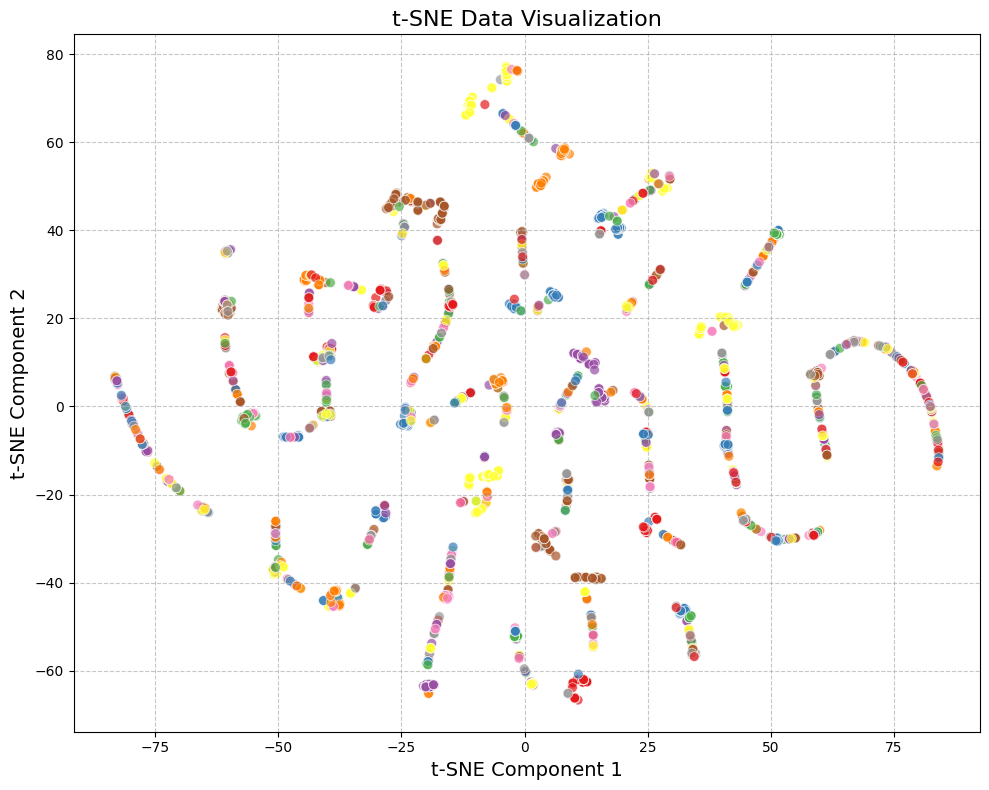

In [37]:
#Візуалізуємо дані
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import pandas as pd

# Знижуємо розмірність до двох
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:, 0], 'tsne_2': tsne_result[:, 1], 'label': Y})

# Візуалізуємо дані
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=50, palette='Set1', alpha=0.7)

# Прибираємо легенду
ax.legend_.remove()

ax.set_title('t-SNE Data Visualization', fontsize=16)
ax.set_xlabel('t-SNE Component 1', fontsize=14)
ax.set_ylabel('t-SNE Component 2', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()